# 可视化方式

## 一维可视化

In [6]:
require(timevis)    # 创建交互式时间线（timeline）可视化的 R 语言包
require(data.table)
library(htmlwidgets)
donations <- fread("../../demo_code/Ch02/data/donations.csv")
d <- donations[, .(min(timestamp), max(timestamp)), user]
names(d) <- c("content", "start", "end")
d <- d[start != end]
timeline <- timevis(d[sample(1:nrow(d), 20)])
# 保存交互式图形为 HTML 文件
saveWidget(timeline, "timeline.html")

# 在默认浏览器中打开该文件
browseURL("timeline.html")

In [8]:
timeline

HTML widgets cannot be represented in plain text (need html)

## 二维可视化

In [7]:
# 注意: R 中是列优先
t(matrix(AirPassengers, nrow = 12, ncol = 12))  # 进行了一次转置

112,118,132,129,121,135,148,148,136,119,104,118
115,126,141,135,125,149,170,170,158,133,114,140
145,150,178,163,172,178,199,199,184,162,146,166
171,180,193,181,183,218,230,242,209,191,172,194
196,196,236,235,229,243,264,272,237,211,180,201
204,188,235,227,234,264,302,293,259,229,203,229
242,233,267,269,270,315,364,347,312,274,237,278
284,277,317,313,318,374,413,405,355,306,271,306
315,301,356,348,355,422,465,467,404,347,305,336
340,318,362,348,363,435,491,505,404,359,310,337
360,342,406,396,420,472,548,559,463,407,362,405


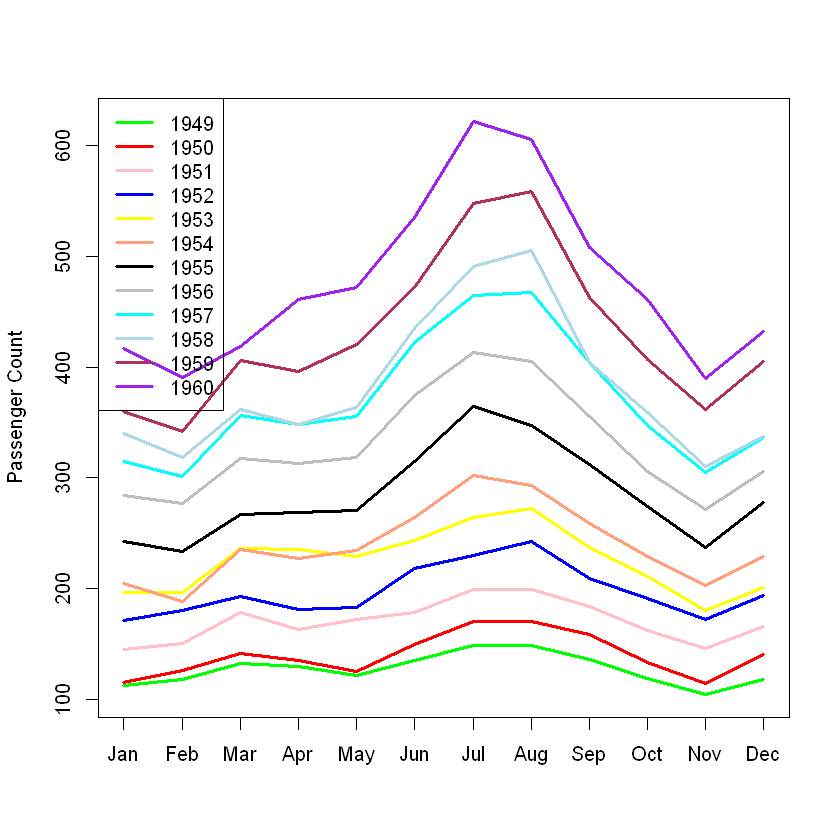

In [15]:
colors <- c("green",  "red", "pink",  "blue",
            "yellow","lightsalmon", "black", "gray",
            "cyan", "lightblue", "maroon", "purple")
matplot(matrix(AirPassengers, nrow = 12, ncol =  12),
        type = "l", col = colors, lty = 1, lwd = 2.5,
        xaxt = "n", ylab = "Passenger Count")       # xaxt = "n"：取消默认的 x 轴标签，以便后续自定义
legend("topleft", legend = 1949:1960, lty = 1, lwd = 2.5,   # legend: 添加图例
        col = colors)
axis(1, at = 1:12, labels = c("Jan", "Feb", "Mar", "Apr",       # 1: 指定x轴
                                "May", "Jun", "Jul", "Aug",
                                "Sep", "Oct", "Nov", "Dec"))
# 输出每年按月计算的客流量

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



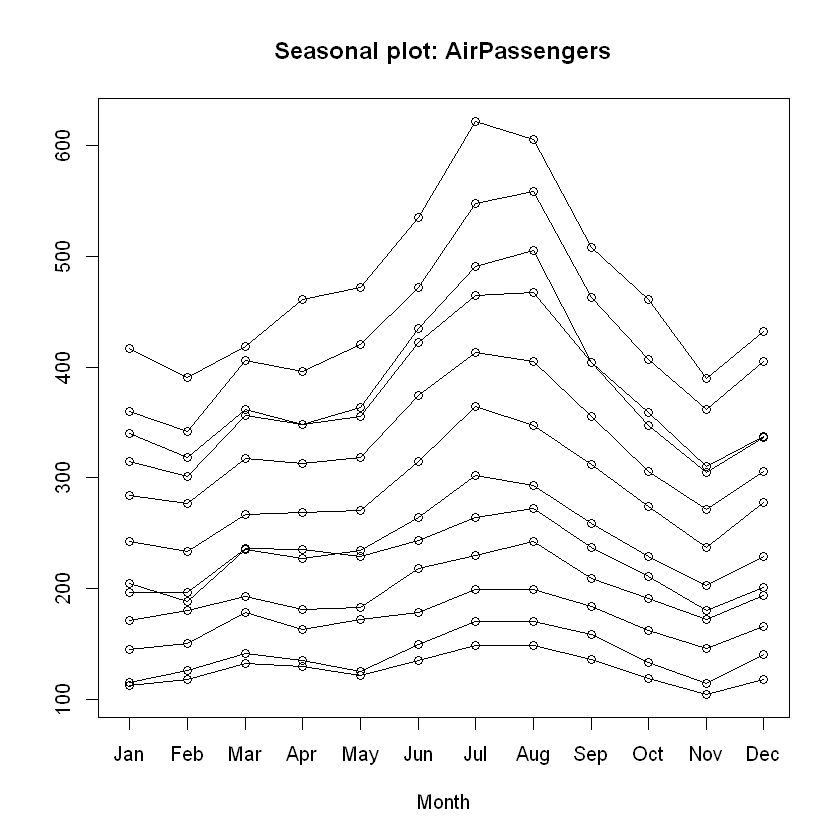

In [17]:
require(forecast)
seasonplot(AirPassengers)

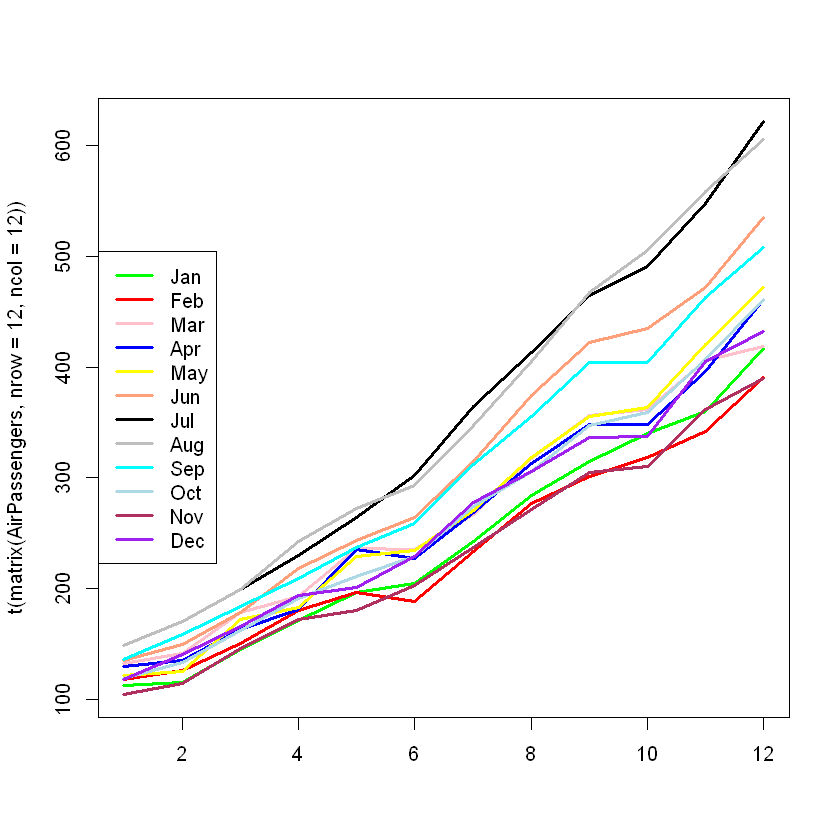

In [19]:
# 根据年份绘制的每月图线
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
matplot(t(matrix(AirPassengers, nrow = 12, ncol = 12)),
        type = 'l', col = colors, lty = 1, lwd = 2.5)
legend("left", legend = months,
        col = colors, lty = 1, lwd = 2.5)

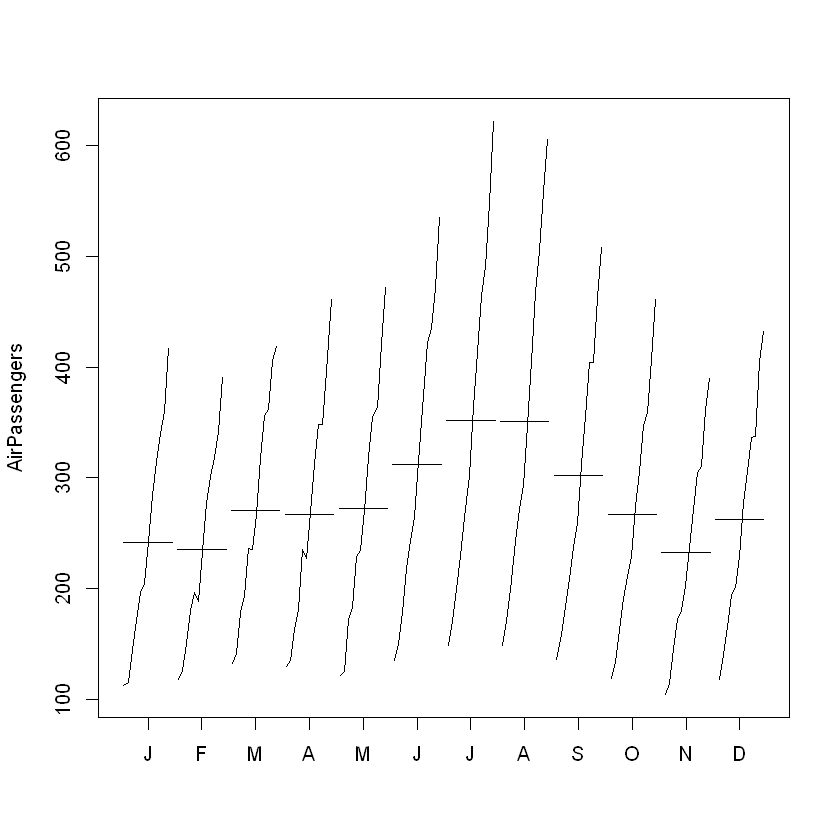

In [18]:
monthplot(AirPassengers)

In [24]:
hist2d <- function(data, nbins.y, xlabels) {
  # 我们使 ybins 均匀分布
  # 以包含最小点和最大点
  ymin = min(data)
  ymax = max(data) * 1.0001  # 扩大最大值，以确保包含最大点
  
  # 避免包含/排除的懒惰方法，创建 ybins 序列 一个均匀分布的区间序列，确保每个数据点落入适当的区间
  ybins = seq(from = ymin, to = ymax, length.out = nbins.y + 1)
  
  # 生成适当大小的零矩阵 存储各个区间的计数
  hist.matrix = matrix(0, nrow = nbins.y, ncol = ncol(data))
  
  # 数据以矩阵形式出现
  # 其中每一行表示一个数据点
  for (i in 1:nrow(data)) {
    ts = findInterval(data[i, ], ybins)  # 查找每个数据点所在的区间 确定数据点在哪个区间内
    for (j in 1:ncol(data)) {
      # 根据区间位置更新矩阵
      hist.matrix[ts[j], j] = hist.matrix[ts[j], j] + 1
    }
  }
  
  # 返回生成的直方图矩阵
  return(hist.matrix)
}


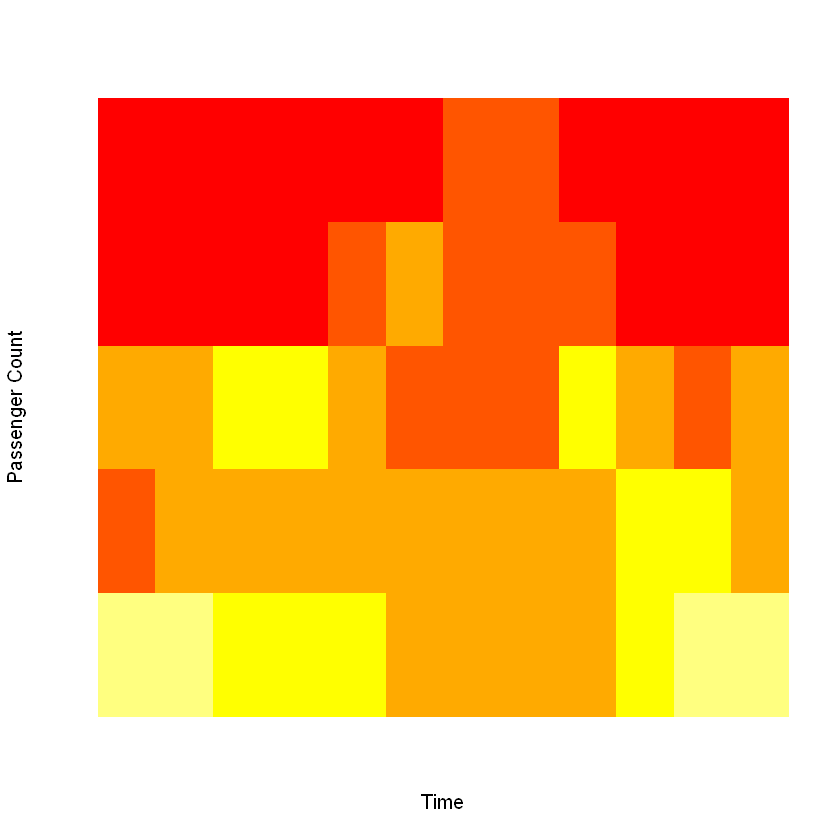

In [ ]:
# 使用 hist2d 函数生成一个二维直方图
h = hist2d(t(matrix(AirPassengers, nrow = 12, ncol = 12)), 5, months)

# 使用 image 函数绘制热力图
image(1:ncol(h), 1:nrow(h), t(h), col = heat.colors(5), # heat.colors(5) 生成 5 种颜色的渐变色（从冷色到暖色）
      axes = FALSE, xlab = "Time", ylab = "Passenger Count")
